In [3]:
import tweepy
from tweepy import Stream 
from tweepy import OAuthHandler
from tweepy import StreamListener


In [4]:
consumer_key = "njtvNg0KHiRwi9E1KXpDAJlpS"
consumer_secret = "sg7dDWWGytmAOCX4Dr6hyYZ0dsSqDiinzZwaj5v012d0cAxgQz"
access_token = "1034315062088003584-65LIPgvaArzgwmYmMoedZwjf76t1DN"
access_key = "yJj6eJfvEmc0HwQx0gUu1887AxZIGgUMQGMs9iyra1e9A"

In [5]:
class Data_Fetch(StreamListener):
    def on_data(self,tweets):
        f = open("tweets.json","a")
        f.write(tweets)
        f.close()
        return True 
    def on_error(self,err):
        print(err)
        return True

In [ ]:
myobj = Data_Fetch()

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_key)

stream = Stream(auth,myobj)

stream.filter(track=["cricket"])

In [1]:
fp = open("tweets.json")

one = fp.readline()

In [4]:
import json 


data = json.loads(one)

In [5]:
print(type(data))

<class 'dict'>


In [7]:
print(*data.keys(),sep="\n")

created_at
id
id_str
text
display_text_range
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
extended_tweet
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms


In [8]:
data['lang']

'in'

In [9]:
data['text']

'@ZAbbasOfficial @TheRealPCB @babarazam258 @iShaheenAfridi @76Shadabkhan @SarfarazA_54 Pcb itny paisy leke team nahi… https://t.co/iz39gXD3Kc'

In [10]:
data['place']

In [12]:
data['user']['name']

'muhmmad  adil khan'

In [13]:
fp.seek(0)
tweets = []

for line in fp  : 
    try : 
        text = json.loads(line)
        tweets.append(text)
    except Exception as e : 
        continue 
else : 
    fp.close()

In [14]:
len(tweets)

1491

In [16]:
for t in tweets : 
    if t['place'] : 
        data = t
        break

In [19]:
t['place']['country']

'India'

In [20]:
t['text']

'My favourite player ..'

In [23]:
c = 0
india = []
for tweet in tweets : 
    if tweet['place'] and tweet['place']['country'] == "India" : 
        india.append(tweet)
        c += 1

In [24]:
c

9

In [26]:
for tweet in india : 
    print(tweet['text'],"\n\n")

My favourite player .. 


📆July 2019
🏏PAK v BAN, Match 43
BAN 221 (44.1)
PAK 315-9 (50)
Pakistan won by 94 runs
✡️4 teams in Semifinals - Ind… https://t.co/NVmhdGXvOE 


EA Cricket, Real Cricket, WCC2 games : Lol, Rofl, Lmao 


@ashwinravi99 @DjokerNole Bhai cricket nahi dekh rahe ho kya? 


@anasali87449582 @iramizraja MC BC, bhag jao salo tum kya khelo ge World cup, Gully cricket ke layak nahi ho Haram Khurrr.. 


@AmitSha77461530 @ImranKhanPTI Beta tum log to sirf jehadis paida kiya hai- kt mullah, to cricket match kahan se kh… https://t.co/HNHhhfCVhO 


Superb 👌 


#India Vs #Srilanka
Who will be the winner today? #ContestAlert
A. India
B. SriLanka

Follow @shopper_mb #Cricket W… https://t.co/Cb8T2lW09m 


♥️♥️♥️ 




In [27]:
import pandas as pd 

In [28]:
df = pd.DataFrame()

In [29]:
df

""


In [32]:
print(*data.keys(),sep="\n")

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
quoted_status_id
quoted_status_id_str
quoted_status
quoted_status_permalink
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms


In [42]:
data['text'].split()

['My', 'favourite', 'player', '..']

In [39]:
df["text"] = list(map(lambda tweet:tweet['text'],tweets))

In [53]:
t = tweets[17]

In [58]:
list(filter(lambda tag : tag if "#" in tag else None, t['text'].split()))

[]

In [60]:
def tag(tweets):
    count = {}
    for tweet in tweets : 
        text = tweet['text']
        text = text.split( )
        for tag in text : 
            if "#" in tag :
                    if tag in count : 
                        count[tag] += 1
                    else : 
                        count[tag] = 1
    return count
    
                

In [62]:
tags = pd.Series(tag(tweets))

In [63]:
tags.head()

#Ashes                  1
#Dhoni                 11
#CWC19                 19
#INDvSL                17
#ICCCricketWorldCup     1
dtype: int64

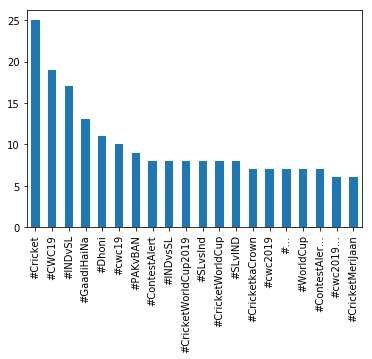

In [67]:

tags.sort_values(ascending=False)[:20].plot(kind='bar')

In [ ]:
def country(tweets):
    count = {}
    for tweet in tweets : 
        text = tweet['place']
        text = text.split( )
        for tag in text : 
            if "#" in tag :
                    if tag in count : 
                        count[tag] += 1
                    else : 
                        count[tag] = 1
    return count
    
                